In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv(r"C:\Users\omkar\AI\AIML Internship\Task3\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [97]:
df.shape

(545, 13)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [99]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [100]:
df.duplicated().sum()

0

In [101]:
df_numeric = df.select_dtypes(include=['float','int'])
df_categorical = df.select_dtypes(include=['object'])

<Axes: >

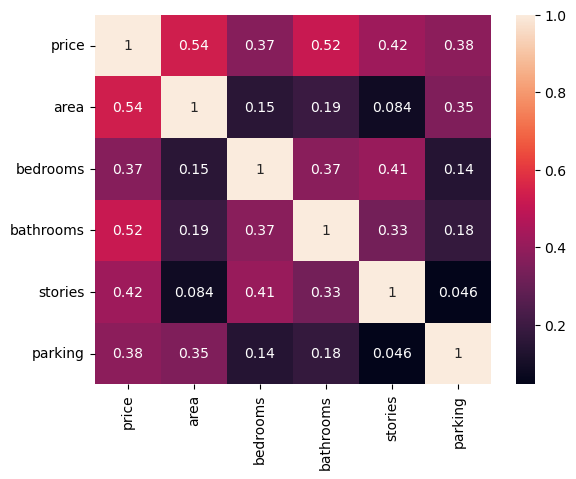

In [102]:
sns.heatmap(df_numeric.corr(),annot=True)

In [103]:
df_categorical = pd.get_dummies(df_categorical,drop_first=True).astype(int)

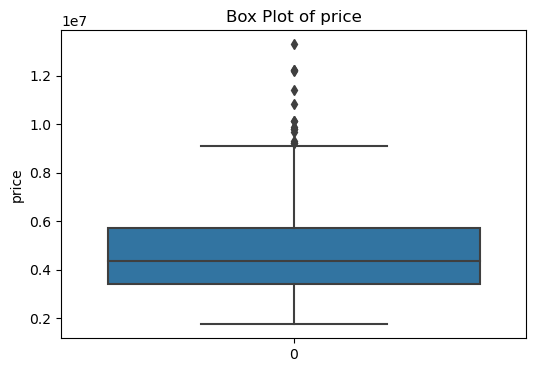

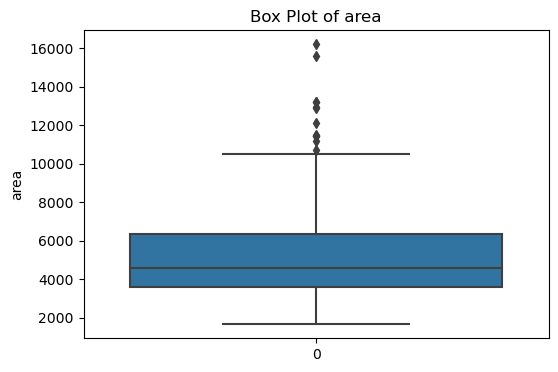

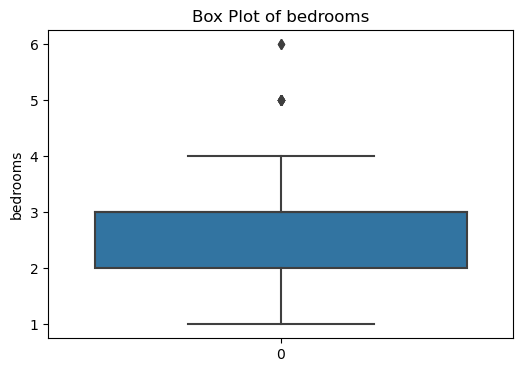

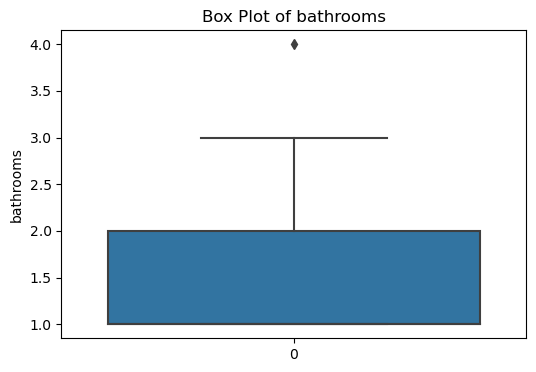

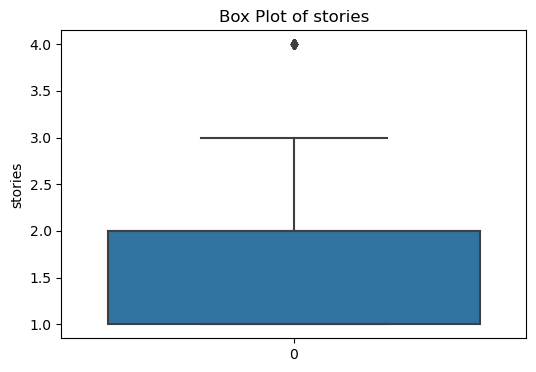

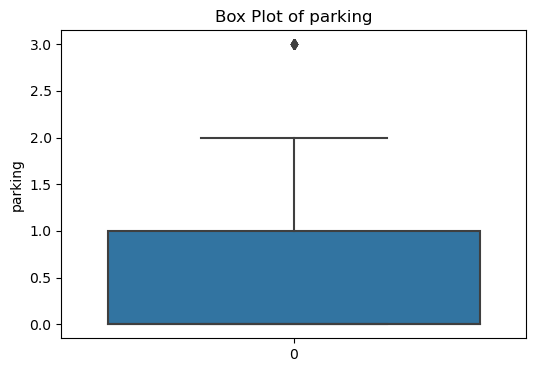

In [104]:
for col in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df_numeric[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [105]:
for column in df_numeric:
    Q1 = df_numeric[column].quantile(0.25)
    Q3 = df_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_numeric[column] = np.where(df_numeric[column] < lower_bound, lower_bound, df_numeric[column])
    df_numeric[column] = np.where(df_numeric[column] > upper_bound, upper_bound, df_numeric[column])

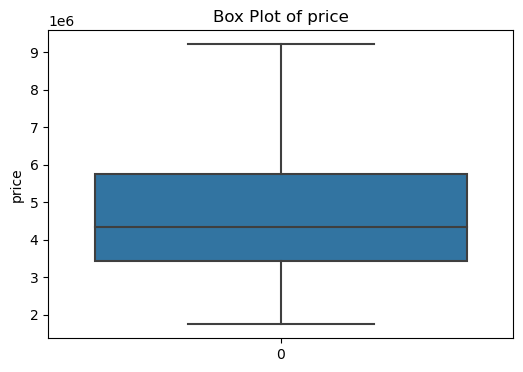

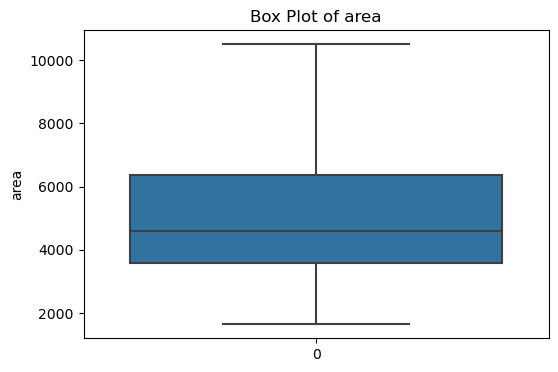

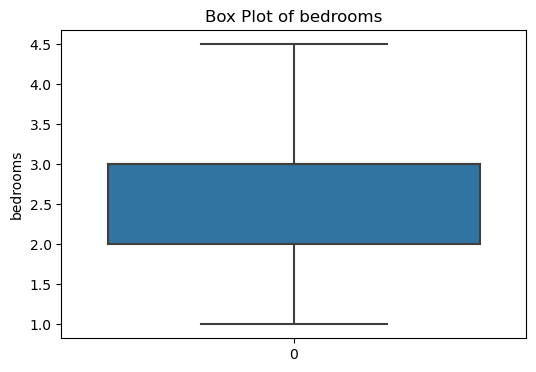

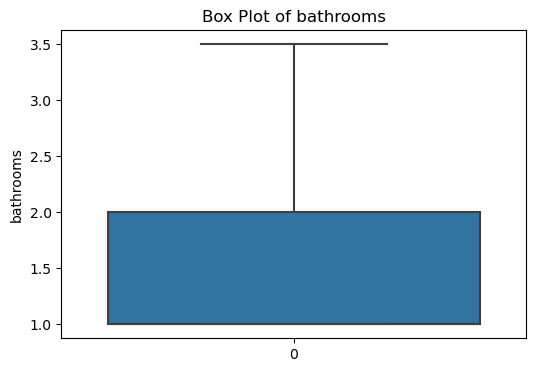

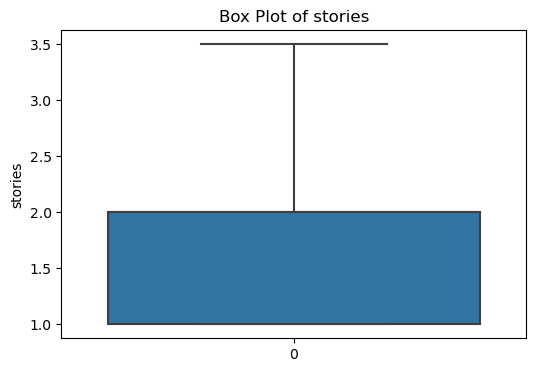

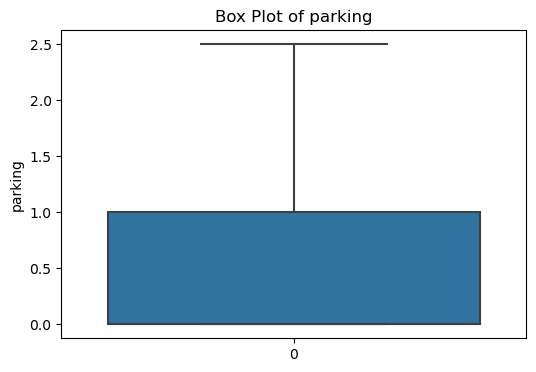

In [106]:
for col in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df_numeric[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [107]:
df = pd.concat([df_numeric, df_categorical], axis=1)

In [108]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000.0,7420.0,4.0,2.0,3.0,2.0,1,0,0,0,1,1,0,0
1,9205000.0,8960.0,4.0,3.5,3.5,2.5,1,0,0,0,1,0,0,0
2,9205000.0,9960.0,3.0,2.0,2.0,2.0,1,0,1,0,0,1,1,0
3,9205000.0,7500.0,4.0,2.0,2.0,2.5,1,0,1,0,1,1,0,0
4,9205000.0,7420.0,4.0,1.0,2.0,2.0,1,1,1,0,1,0,0,0


In [109]:
X = df.drop("price",axis="columns")
y = df['price']

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  =train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('Intercept is', lr.intercept_)
print("Coefficients are", lr.coef_)

Intercept is 285169.32880721614
Coefficients are [ 2.55243660e+02  6.24545116e+04  1.01887562e+06  4.32251369e+05
  1.96247178e+05  3.74057164e+05  2.39027316e+05  3.50621918e+05
  7.15118571e+05  7.62723725e+05  5.86645650e+05 -9.70440254e+04
 -3.89033402e+05]


In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [113]:
print("Mean Squared Error:- ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:- ",mean_absolute_error(y_test,y_pred))
print("R2 Score:- ",r2_score(y_test,y_pred))

Mean Squared Error:-  1286637069521.3796
Mean Absolute Error:-  880919.5116025086
R2 Score:-  0.6815169542374228


Text(0, 0.5, 'Predicted Values')

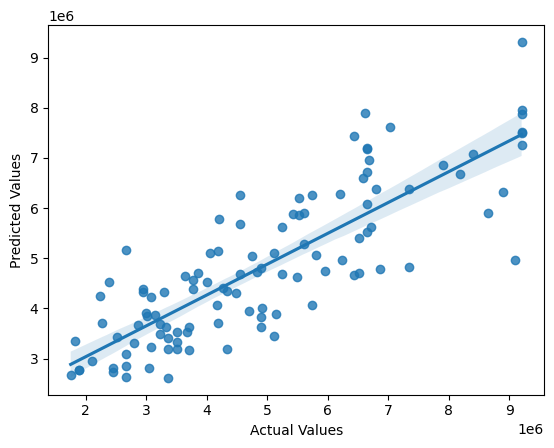

In [115]:
import matplotlib.pyplot as plt                                  
import seaborn as sns 
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')